# NOTEBOOK_NAME003：超参数与模型验证

此notebook包括：

**留出集`train_test_split()`** 与 **交叉验证`cross_val_score()`**

**验证曲线`validation_curve()`** 与 **学习曲线`learn_curve()`**

**网格搜索`grid_search()`** 寻找最优参数的方法

最优模型问题可看作为找出**偏差与方差平衡点**的问题

影响模型复杂度的两个因素：**训练数据集规模**与**模型复杂度**

`np.ravel()`新知识点1 - 降低矩阵维度的方法

学习笔记：Python科学手册

橙子 2018/11/24

------------------------------------------------------------------------

## 1.模型验证

两种方法：**留出集(holdout set)**与**交叉检验(cross-validation)**

### 1.1留出集 train_test_split()

缺点：使模型失去了一部分训练的机会

In [1]:
# 导入数据
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# 导入与初始化模型
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors = 3)

# 留出集
from sklearn.cross_validation import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                 train_size=0.5)
# 模型训练
model_KNN.fit(X1, y1)

from sklearn.metrics import accuracy_score
y2_model = model_KNN.predict(X2)
print('accuracy_score of holdout set prediction:',accuracy_score(y2, y2_model))

import warnings 
warnings.filterwarnings('ignore')

accuracy_score of holdout set prediction: 0.933333333333


C:\Users\lwhpc\Anaconda3\envs\py36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 1.2交叉验证 cross_val_score(内置多种交叉检验方法)

In [2]:
import numpy as np
from sklearn.cross_validation import cross_val_score
Cross_Val_Score = cross_val_score(model_KNN, X, y, cv=5)

print('Cross_Val_Score:', Cross_Val_Score)
print('Cross_Val_Mean_Score:', np.mean(np.array(Cross_Val_Score)))

Cross_Val_Score: [ 0.96666667  0.96666667  0.93333333  0.96666667  1.        ]
Cross_Val_Mean_Score: 0.966666666667


极端情况：**留一检验LOO(leave-one-out)**

各种交叉检验方法以**迭代器**形式在cross_validation模块中实现

In [3]:
from sklearn.cross_validation import LeaveOneOut
LOO_scores = cross_val_score(model_KNN, X, y, cv=LeaveOneOut(len(X)))
print('LOO_Score:', LOO_scores)
print('LOO_Mean_Score:', np.mean(np.array(LOO_scores)))

LOO_Score: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.
  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.]
LOO_Mean_Score: 0.96


## 2.选择最优模型（不同模型复杂度的调整方法不同）

最优模型问题可看作为找出**偏差与方差平衡点**的问题

复杂度较低的模型（高偏差）时，训练数据一般欠拟合，说明模型对训练数据和新数据都缺乏预测能力。

复杂度较高的模型（高方差）时，训练数据一般过拟合，说明模型对训练数据预测能力很强，对新数据预测能力差。

### 2.2验证曲线（validation_curve）

拟合多项式 此例控制模型复杂度的关键是多项式次数。多项式次数取多少时才能在偏差和方差间达到平衡？

`validation_curve()`只需提供模型、数据、参数名、验证范围

`np.ravel()`新知识点1

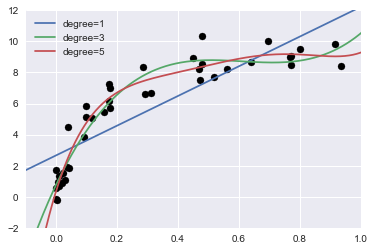

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline   # 管道命令

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

# 创造一些值来拟合多项式
import numpy as np
def make_data(N, err=1.0, rseed=1):
    # 随机取样数据seed
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # 设置图样为seaborn风格

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:  # PolynomialRegression多项式回归模型
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test) # degree:多项式次数
    # np.ravel() 降维 行序优先
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

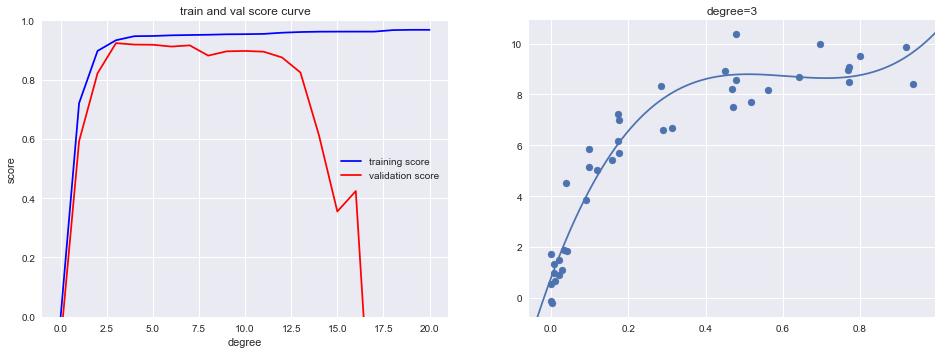

In [5]:
# validation_curve
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21) # 验证多项式次数0到20次
# 交叉验证7次
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)
## 可视化 np.median() 交叉验证7次的中位数得分
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.title('train and val score curve')
plt.xlabel('degree')
plt.ylabel('score')

## degree=3时达到最佳平衡 可视化：
plt.subplot(2,2,2)
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)
plt.title('degree=3')
plt.show()

### 学习曲线(learn curve)

影响模型复杂度的两个因素：**训练数据集规模**与**模型复杂度**

学习曲线最重要的特征是：**随着训练样本的增加，分数会收敛到定值**，此时改善模型就只能换复杂度更高的模型。



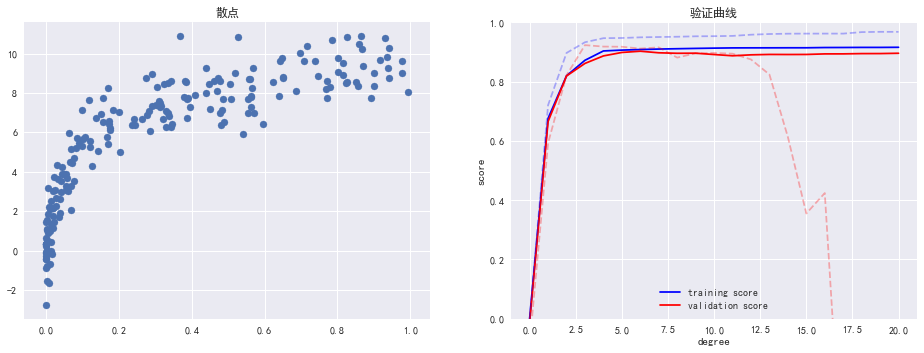

In [6]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 比上例增加5倍数据量
X2, y2 = make_data(200)
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.scatter(X2.ravel(), y2)
plt.title(u'散点')

degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree', degree, cv=7)
# 验证曲线
plt.subplot(2,2,2)
plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')
plt.title(u'验证曲线')
plt.show()

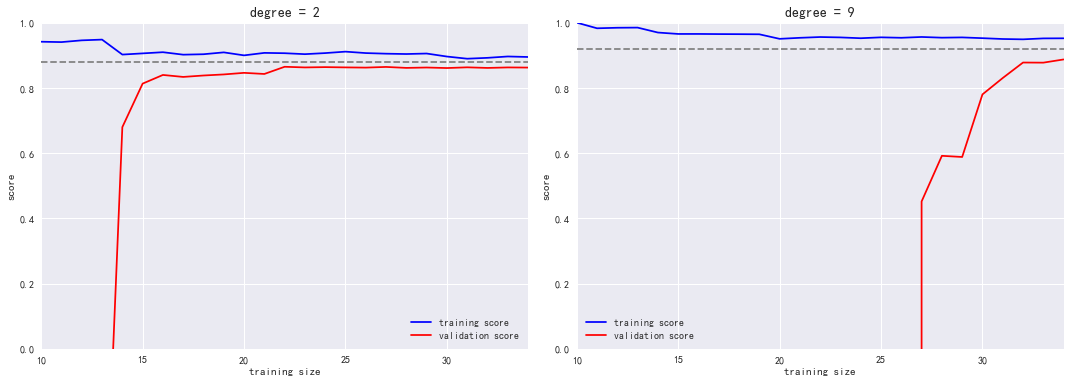

In [7]:
# 学习曲线
from sklearn.learning_curve import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]): # i两幅图 degree1-9次多项式 cv交叉验证7次
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

上图展示模型得分随着训练数据规模的变化而变化

## 3.验证实践：网格搜索(grid_search)

下面是网格搜索寻找最优多项式回归模型的实例。

将在模型特征的三维网络中寻找最优值-**包括多项式的次数的搜索范围、回归模型是否拟合截距、以及是否需要进行标准化处理**

可以**自定义得分函数、并行计算、随机化搜索**等

In [8]:
# 导入GridSearchCV
from sklearn.grid_search import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
# 调用fit()方法在每个网格点上拟合模型，记录每个点的得分
grid.fit(X, y)
# 输出得分最高参数
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

(-0.058375912843486651,
 0.99590640493969607,
 -0.74852374550399747,
 10.92057542617113)

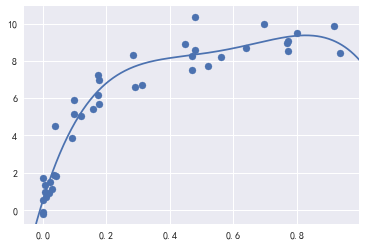

In [9]:
# 选择最优参数模型
model = grid.best_estimator_
# 可视化
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, hold=True);
plt.axis(lim)